**IMPORT THE NECESSARY LIBRARIES**

In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
tf.__version__

'2.15.0'

**EXTRACTION OF FEATURES FROM ALL IMAGES**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = '/content/drive/MyDrive/Neural Networks for Image Classification/homer_bart_1.zip'

In [5]:
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [6]:
directory = '/content/homer_bart_1'

In [7]:
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['/content/homer_bart_1/.DS_Store', '/content/homer_bart_1/bart1.bmp', '/content/homer_bart_1/bart10.bmp', '/content/homer_bart_1/bart100.bmp', '/content/homer_bart_1/bart101.bmp', '/content/homer_bart_1/bart102.bmp', '/content/homer_bart_1/bart103.bmp', '/content/homer_bart_1/bart104.bmp', '/content/homer_bart_1/bart105.bmp', '/content/homer_bart_1/bart106.bmp', '/content/homer_bart_1/bart108.bmp', '/content/homer_bart_1/bart109.bmp', '/content/homer_bart_1/bart11.bmp', '/content/homer_bart_1/bart110.bmp', '/content/homer_bart_1/bart111.bmp', '/content/homer_bart_1/bart112.bmp', '/content/homer_bart_1/bart113.bmp', '/content/homer_bart_1/bart114.bmp', '/content/homer_bart_1/bart115.bmp', '/content/homer_bart_1/bart116.bmp', '/content/homer_bart_1/bart117.bmp', '/content/homer_bart_1/bart118.bmp', '/content/homer_bart_1/bart119.bmp', '/content/homer_bart_1/bart12.bmp', '/content/homer_bart_1/bart120.bmp', '/content/homer_bart_1/bart121.bmp', '/content/homer_bart_1/bart122.bmp', '/conte

In [8]:
type(files)

list

In [9]:
show_images = True
features = []

In [10]:
export = "mouth, pants, shoes, tshirt, shorts, sneakers, class\n"

In [11]:
for image_path in files:
  try:
    original_image = cv2.imread(image_path)
    (H, W) = original_image.shape[:2]
  except:
    continue
  # Copy the image
  image = original_image.copy()
  image_features = []
  # Homer features
  mouth = pants = shoes = 0
  # Bart features
  tshirt = shorts = sneakers = 0

  image_name = os.path.basename(os.path.normpath(image_path))

  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  for height in range(0, H):
    for width in range(0, W):
      blue = image.item(height, width, 0)
      green = image.item(height, width, 1)
      red = image.item(height, width, 2)

      # Homer - brown mouth
      if (blue >= 95 and blue <= 185 and green >= 160 and green <= 185 and red >= 175 and red <= 200):
        image[height, width] = [0, 255, 255]
        mouth += 1

      # Homer - blue pants
      if (blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >= 0 and red <= 90):
        image[height, width] = [0, 255, 255]
        pants += 1

      # Homer - gray shoes
      if height > (height / 2):
        if (blue >= 25 and blue <= 45 and green >= 25 and green <= 45 and red >= 25 and red <= 45):
          image[height, width] = [0, 255, 255]
          shoes += 1

      # Bart - orange t-shirt
      if (blue >= 11 and blue <= 22 and green >= 85 and green <= 105 and red >= 240 and red <= 255):
        image[height, width] = [0, 255, 128]
        tshirt += 1

      # Bart - blue shorts
      if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
        image[height, width] = [0, 255, 128]
        shorts += 1

      # Bart - blue sneakers
      if height > (H / 2):
        if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
          image[height, width] = [0, 255, 128]
          sneakers += 1

  mouth = round(mouth / (H * W)* 100, 9)
  pants = round(pants / (H * W)* 100, 9)
  shoes = round(shoes / (H * W)* 100, 9)

  tshirt = round((tshirt / (H * W)) * 100, 9)
  shorts = round((shorts / (H * W)) * 100, 9)
  sneakers = round((sneakers / (H * W)) * 100, 9)

  image_features.append(mouth)
  image_features.append(pants)
  image_features.append(shoes)
  image_features.append(tshirt)
  image_features.append(shorts)
  image_features.append(sneakers)
  image_features.append(class_name)

  features.append(image_features)


  print(f'Homer Mouth:{image_features[0]} Homer Pants:{image_features[1]} Homer Shoes:{image_features[2]}')
  print(f'Bart tshirt:{image_features[3]} Bart Shorts:{image_features[4]} Homer Sneakers:{image_features[5]}')

  f = (",".join([str(item) for item in image_features]))
  export += f + '\n'

  if show_images == True:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    fig, im = plt.subplots(1, 2)
    im[0].axis('off')
    im[0].imshow(original_image)
    im[1].axis('off')
    plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [12]:
export

'mouth, pants, shoes, tshirt, shorts, sneakers, class\n0.130229228,0.0,0.23145005,6.886101887,3.495204355,3.495204355,0\n0.100643173,0.0,0.156206591,5.004901113,3.183888705,3.183888705,0\n0.130731338,0.0,0.217885563,5.264620437,5.029682961,5.029682961,0\n0.040344716,0.480168257,0.170638306,0.0,0.0,0.0,0\n0.041300756,0.0,0.070283743,8.978929368,3.459119497,3.459119497,0\n0.060412225,0.0,0.132669983,6.75432362,0.948827292,0.948827292,0\n0.328289632,0.0,0.058851057,9.693407263,4.104683977,4.104683977,0\n0.053691275,0.0,0.236241611,0.0,0.0,0.0,0\n0.038914027,0.0,0.212217195,0.0,0.0,0.0,0\n0.073700502,0.0,0.279009044,9.594752524,7.522715548,7.522715548,0\n0.116946779,0.0,0.205182073,0.0,0.0,0.0,0\n0.039643543,0.0,0.062536293,19.545383481,0.0,0.0,0\n0.063836333,0.0,0.0,6.495154592,5.599138594,5.599138594,0\n0.10318558,0.0,0.145337988,0.0,0.0,0.0,0\n0.057932264,0.0,0.101505249,8.395721925,0.0,0.0,0\n0.104881654,0.0,0.018222681,8.915750471,0.0,0.0,0\n0.083151367,0.0,0.165953358,11.095816228,4.

In [13]:
with open('features.csv', 'w') as file:
  for l in export:
    file.write(l)
file.closed

True

In [14]:
dataset = pd.read_csv('features.csv')
dataset

mouth      pants     shoes    tshirt    shorts   sneakers   class
0    0.130229   0.000000  0.231450  6.886102  3.495204   3.495204       0
1    0.100643   0.000000  0.156207  5.004901  3.183889   3.183889       0
2    0.130731   0.000000  0.217886  5.264620  5.029683   5.029683       0
3    0.040345   0.480168  0.170638  0.000000  0.000000   0.000000       0
4    0.041301   0.000000  0.070284  8.978929  3.459119   3.459119       0
..        ...        ...       ...       ...       ...        ...     ...
264  6.537861   0.000000  0.250049  0.000000  0.000000   0.000000       1
265  0.103214   0.000000  0.319379  0.000000  0.000000   0.000000       1
266  4.367324   0.000000  0.518477  0.000000  0.000000   0.000000       1
267  1.486022   0.000000  0.081346  0.000000  0.000000   0.000000       1
268  0.958488  13.744248  0.352681  0.000000  0.000000   0.000000       1

[269 rows x 7 columns]

from matplotlib import pyplot as plt
dataset['mouth'].plot(kind='hist', bins=20, title='mouth')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset[' pants'].plot(kind='hist', bins=20, title=' pants')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset[' shoes'].plot(kind='hist', bins=20, title=' shoes')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset[' tshirt'].plot(kind='hist', bins=20, title=' tshirt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='mouth', y=' pants', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x=' pants', y=' shoes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x=' shoes', y=' tshirt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x=' tshirt', y=' shorts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' class']
  ys = series['mouth']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values(' class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' class')
_ = plt.ylabel('mouth')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' class']
  ys = series[' pants']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values(' class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' class')
_ = plt.ylabel(' pants')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' class']
  ys = series[' shoes']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values(' class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' class')
_ = plt.ylabel(' shoes')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series[' class']
  ys = series[' tshirt']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values(' class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel(' class')
_ = plt.ylabel(' tshirt')

from matplotlib import pyplot as plt
dataset['mouth'].plot(kind='line', figsize=(8, 4), title='mouth')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset[' pants'].plot(kind='line', figsize=(8, 4), title=' pants')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset[' shoes'].plot(kind='line', figsize=(8, 4), title=' shoes')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dataset[' tshirt'].plot(kind='line', figsize=(8, 4), title=' tshirt')
plt.gca().spines[['top', 'right']].set_visible(False)

**VISUALIZE SOME DATA SUBSET**

```
# This is formatted as code
```



In [15]:
X = dataset.iloc[:, 0:6].values
X

array([[ 0.13022923,  0.        ,  0.23145005,  6.88610189,  3.49520435,
         3.49520435],
       [ 0.10064317,  0.        ,  0.15620659,  5.00490111,  3.18388871,
         3.18388871],
       [ 0.13073134,  0.        ,  0.21788556,  5.26462044,  5.02968296,
         5.02968296],
       ...,
       [ 4.36732385,  0.        ,  0.51847662,  0.        ,  0.        ,
         0.        ],
       [ 1.48602235,  0.        ,  0.08134577,  0.        ,  0.        ,
         0.        ],
       [ 0.95848845, 13.74424774,  0.35268139,  0.        ,  0.        ,
         0.        ]])

In [16]:
y = dataset.iloc[:, 6].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

**PERFORM DATA TRAIN AND TEST SPLIT SET**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215, 6), (54, 6), (215,), (54,))

**BUILD THE NEURAL AND COMPILE NETWORK**

In [20]:
# 6 -> 4 -> 4 -> 4 -> 1
NN = tf.keras.models.Sequential()
NN.add(tf.keras.layers.Dense(input_shape = (6,), units = 4, activation='relu'))  # input layer
NN.add(tf.keras.layers.Dense(units = 4, activation='relu'))  # hidden layer 1
NN.add(tf.keras.layers.Dense(units = 4, activation='relu'))  # hidden layer 2
NN.add(tf.keras.layers.Dense(units = 1, activation='sigmoid')) # output layer

In [21]:
# View the Neural Network
NN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Compile the neural network
import keras
NN.compile(
          optimizer=keras.optimizers.Adam(learning_rate=1e-4),
           loss='binary_crossentropy',
           metrics=['accuracy']
           )

In [23]:
# Fit the neural network to the training data set
history = NN.fit(X_train, y_train, epochs=50)

Epoch 1/50
7/7 [==============================] - 2s 5ms/step - loss: 0.7401 - accuracy: 0.4977
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7381 - accuracy: 0.4884
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7359 - accuracy: 0.4884
Epoch 4/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7335 - accuracy: 0.4930
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7314 - accuracy: 0.4930
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7291 - accuracy: 0.4930
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7272 - accuracy: 0.4930
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7247 - accuracy: 0.4930
Epoch 9/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7227 - accuracy: 0.4884
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 0.7207 - accuracy: 0.4884
Epoch 11/50
7/7 [======================

**EVALUATE THE NEURAL NETWORK**

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

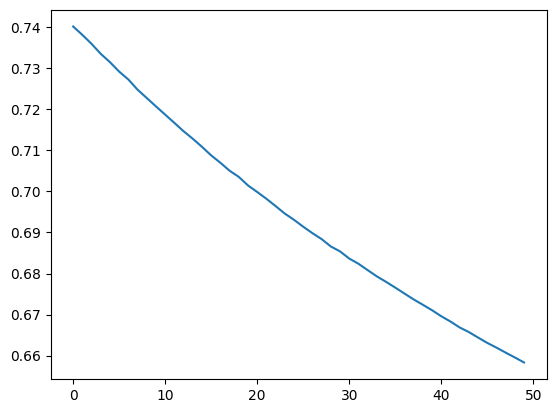

In [25]:
plt.plot(history.history['loss'])

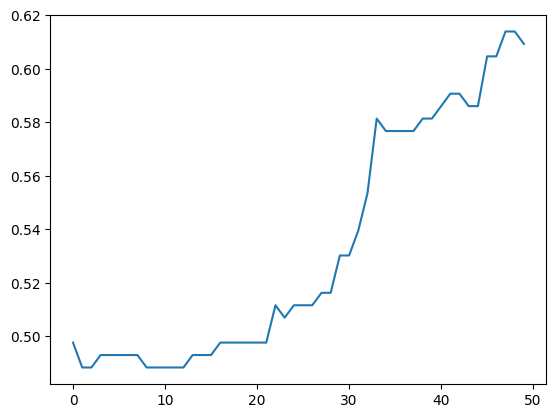

In [26]:
plt.plot(history.history['accuracy'])

In [27]:
X_test.shape

(54, 6)

**TEST THE NEURAL NETWORK ON THE TEST DATASET**

In [28]:
predictions = NN.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [29]:
predictions

array([[0.48166442],
       [0.46353844],
       [0.5036545 ],
       [0.50032145],
       [0.27225372],
       [0.49980065],
       [0.24792781],
       [0.5048409 ],
       [0.4722874 ],
       [0.49122787],
       [0.49385196],
       [0.48839357],
       [0.18223128],
       [0.12423877],
       [0.50205666],
       [0.50426364],
       [0.1292453 ],
       [0.49949864],
       [0.48487562],
       [0.31848735],
       [0.41106153],
       [0.49628952],
       [0.04091378],
       [0.47223282],
       [0.07966539],
       [0.50178653],
       [0.4895251 ],
       [0.4274882 ],
       [0.04730533],
       [0.25475818],
       [0.5029762 ],
       [0.48949385],
       [0.4985135 ],
       [0.02640543],
       [0.50411075],
       [0.4776137 ],
       [0.4937396 ],
       [0.49983096],
       [0.49101773],
       [0.2623015 ],
       [0.33003297],
       [0.4985135 ],
       [0.48124596],
       [0.23657727],
       [0.41383737],
       [0.49222183],
       [0.3694844 ],
       [0.251

In [30]:
predictions = (predictions > 0.5)

In [31]:
predictions

array([[False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False]])

In [32]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

**COMPARE ACCURACY AND VISUALIZE THE COMPARISON**

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [34]:
accuracy_score(y_test, predictions)

0.6111111111111112

<Axes: >

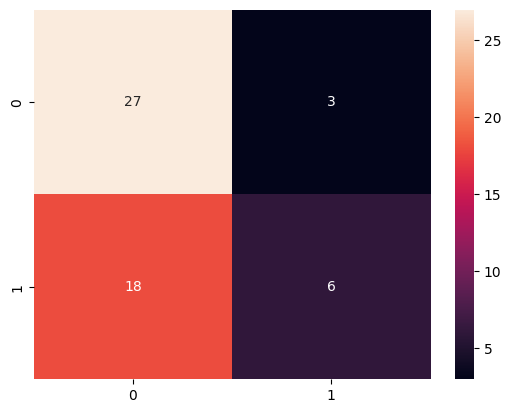

In [35]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

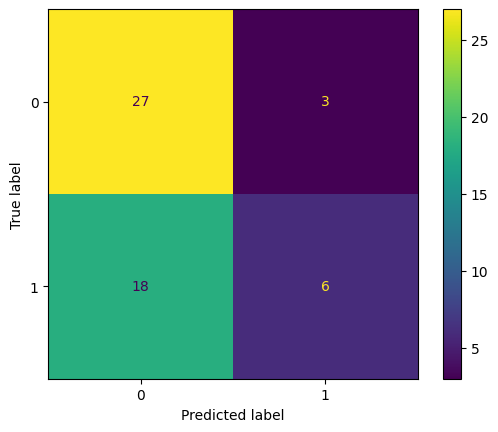

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        30
           1       0.67      0.25      0.36        24

    accuracy                           0.61        54
   macro avg       0.63      0.57      0.54        54
weighted avg       0.63      0.61      0.56        54



**SAVE THE MODEL**

In [38]:
from keras.models import save_model

In [39]:
model2_json = NN.to_json()

# Saving the NN model
with open('image_classification_feature_extraction.json', mode='w') as json_file:
  json_file.write(model2_json)

# Saving the NN weight
NN_weights2 = save_model(NN, 'weights_feature_extraction.hdf5')

<ipython-input-39-301e6b4516ed>:8: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  NN_weights2 = save_model(NN, 'weights_feature_extraction.hdf5')
